# Named entity recognition


## Solution of https://github.com/apohllo/nlp/blob/master/9-ner.md

Randomly select 100 bills.


In [93]:
cp `ls | shuf -n 100` random

Recognize the named entities in the documents using the n82 model.


In [95]:
!python ner.py

Processing: random/1998_593.txt
Processing: random/2003_151.txt
Processing: random/1997_674.txt
Processing: random/1997_751.txt
Processing: random/2004_577.txt
Processing: random/2003_1610.txt
Processing: random/1997_781.txt
Processing: random/2000_1100.txt
Processing: random/2004_146.txt
Processing: random/2004_630.txt
Processing: random/1997_676.txt
Processing: random/1995_480.txt
Processing: random/2000_1322.txt
Processing: random/1998_1115.txt
Processing: random/2001_246.txt
Processing: random/2000_1324.txt
Processing: random/1996_42.txt
Processing: random/2000_839.txt
Processing: random/1997_739.txt
Processing: random/2004_1845.txt
Processing: random/2004_2249.txt
Processing: random/2003_1068.txt
Processing: random/1994_591.txt
Processing: random/1997_506.txt
Processing: random/2004_627.txt
Processing: random/1999_802.txt
Processing: random/2004_2772.txt
Processing: random/1997_470.txt
Processing: random/2000_546.txt
Processing: random/1997_272.txt
Processing: random/2000_179.txt


In [1]:
from os import listdir
from os.path import isfile, join
import xmltodict

Plot the frequency of the recognized classes:
    * fine-grained classification histogram (classes such as nam_fac_bridge, nam_liv_animal).
    * coarse-grained classification histogram (classes such as nam_adj, nam_eve, nam_fac).

In [23]:
import xml.etree.ElementTree as ET

In [63]:
def load_xmls(directory_path):
    files = [file for file in listdir(directory_path) if isfile(join(directory_path, file))]
    entities = {}
    for file in files:
        root = ET.parse(f"{directory_path}/{file}").getroot()
        for chunk in root:
            for sentence in chunk:
                ners = {}
                for tok in sentence:
                    if tok.tag == "tok":
                        token = tok.findall("orth")[0].text
                        for ann in tok:
                            if ann.tag == "ann" and ann.text != "0":
                                if (ann.get('chan'), ann.text) in ners:
                                    values = ners[(ann.get('chan'), ann.text)]
                                    values.append(token)
                                    ners[(ann.get('chan'), ann.text)] = values
                                else:
                                    ners[(ann.get('chan'), ann.text)] = [token]
                for key, value in ners.items():
                    k = (key[0], " ".join(value))
                    if k in entities:
                        v = entities[k]
                        v += 1
                        entities[k] = v
                    else:
                        entities[k] = 1
    return entities

In [64]:
entities = load_xmls('./out')

In [79]:
fine_grained = {}
for key, value in entities.items():
    if key[0] not in fine_grained:
        fine_grained[key[0]] = value
    else:
        v_ = fine_grained[key[0]]
        v_ += 1
        fine_grained[key[0]] = v_

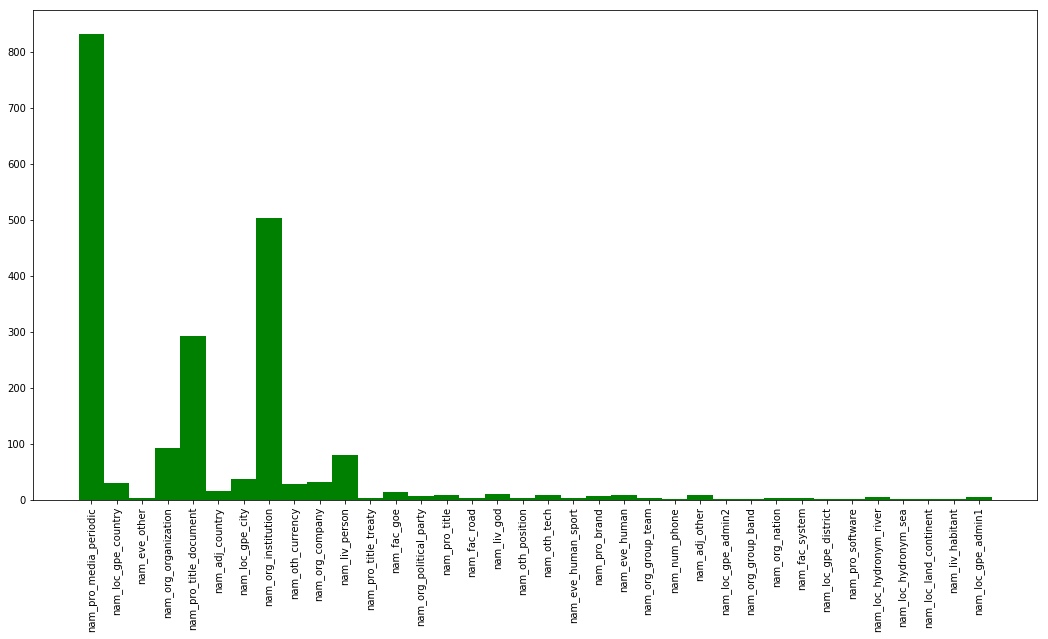

In [88]:
import numpy as np
import matplotlib.pyplot as plt

pos = np.arange(len(fine_grained.keys()))
plt.figure(figsize=(18,9))

plt.bar(fine_grained.keys(), fine_grained.values(), width, color='g')
plt.xticks(pos, fine_grained.keys(), rotation='vertical')
plt.show()

In [97]:
coarse_grained = {}
for key, value in entities.items():
    new_key = ("_".join(key[0].split("_")[:2]))
    if new_key not in coarse_grained:
        coarse_grained[new_key] = value
    else:
        v_ = coarse_grained[new_key]
        v_ += 1
        coarse_grained[new_key] = v_

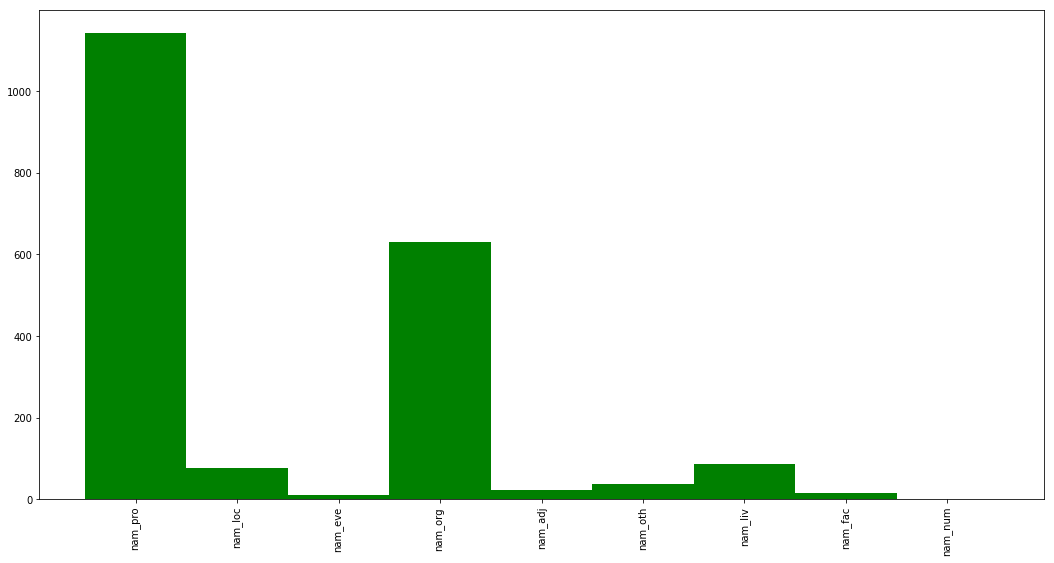

In [99]:
pos = np.arange(len(coarse_grained.keys()))
plt.figure(figsize=(18,9))

plt.bar(coarse_grained.keys(), coarse_grained.values(), width, color='g')
plt.xticks(pos, coarse_grained.keys(), rotation='vertical')
plt.show()

In [106]:
import operator
sorted_x = sorted(entities.items(), key=operator.itemgetter(1), reverse=True)

In [107]:
sorted_x[:50]

[(('nam_pro_media_periodic', 'Dz . U .'), 823),
 (('nam_loc_gpe_country', 'Rzeczypospolitej Polskiej'), 308),
 (('nam_org_institution', 'Skarbu Państwa'), 137),
 (('nam_oth_currency', 'zł'), 126),
 (('nam_org_organization', 'Unii Europejskiej'), 71),
 (('nam_pro_media_periodic', 'Dz . Urz'), 67),
 (('nam_org_institution', 'Prezes Urzędu'), 64),
 (('nam_org_institution', 'Rada Ministrów'), 58),
 (('nam_org_organization', 'EFTA'), 45),
 (('nam_org_institution', 'Skarb Państwa'), 44),
 (('nam_org_company', 'Europejskiego Porozumienia o Wolnym Handlu'), 44),
 (('nam_org_institution', 'Prezesa Urzędu'), 37),
 (('nam_org_institution', 'Straży Granicznej'), 34),
 (('nam_org_institution', 'Służby Celnej'), 33),
 (('nam_org_institution', 'Minister Finansów'), 31),
 (('nam_org_institution', 'Funduszu Pracy'), 31),
 (('nam_org_group_team', 'Produktów Biobójczych'), 30),
 (('nam_org_institution', 'Komendanta Głównego Straży Granicznej'), 29),
 (('nam_org_organization', 'Straży Granicznej'), 28),
 

In [109]:
coarsed_grained_keys = coarse_grained.keys()

In [113]:
coarsed_grained_keys

dict_keys(['nam_pro', 'nam_loc', 'nam_eve', 'nam_org', 'nam_adj', 'nam_oth', 'nam_liv', 'nam_fac', 'nam_num'])

In [117]:
for k in coarsed_grained_keys:
    v1 = list(filter(lambda x: x[0][0].startswith(k), sorted_x))
    print(k)
    for v_ in v1[:10]:
        print(f"{v_[0][1]} : {v_[1]}")
    print()

nam_pro
Dz . U . : 823
Dz . Urz : 67
Kodeksu karnego skarbowego : 17
Kodeksu karnego : 14
Prawo farmaceutyczne : 12
Kodeksu postępowania cywilnego : 11
Kodeksu postępowania administracyjnego : 11
ustawie z dnia 26 lipca 1991 r . o podatku dochodowym od osób fizycznych : 10
Kodeksu cywilnego : 10
Ordynacja podatkowa : 10

nam_loc
Rzeczypospolitej Polskiej : 308
Rejestru : 17
Rzeczpospolitą Polską : 13
Rzecząpospolitą Polską : 5
Rzeczpospolita Polska : 5
Polski : 4
Polską : 4
Nowym Jorku : 4
Warszawy : 4
Krakowie : 4

nam_eve
Straży Granicznej : 4
Ordynacji podatkowej : 3
II wojny światowej : 2
Monitorze Sądowym : 2
Ochotniczych Hufców Pracy : 2
Dobrej Praktyki Dystrybucyjnej : 2
Krajowego Rejestru Sądowego : 1
Programu na lata 2004 - 2011 : 1
Dobrej Praktyki Wytwarzania : 1
Mennicy Państwowej : 1

nam_org
Skarbu Państwa : 137
Unii Europejskiej : 71
Prezes Urzędu : 64
Rada Ministrów : 58
EFTA : 45
Skarb Państwa : 44
Europejskiego Porozumienia o Wolnym Handlu : 44
Prezesa Urzędu : 37
Stra